In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [109]:
orders=pd.read_csv("Orders.csv")

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 


In [122]:
orders.head()
orders.columns
#orders.shape

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [127]:
orders["Sales"]=orders["Sales"].str.replace(",","") # remove commas
orders["Sales"]=orders["Sales"].str.replace("$", "") #remove dollar sign
orders["Sales"]=orders["Sales"].astype(float)


orders["Profit"]=orders["Profit"].str.replace("$", "") 
orders["Profit"]=orders["Profit"].str.replace(",", "") 
orders["Profit"]=orders["Profit"].astype(float)

(array([1.0000e+00, 3.0000e+00, 9.0000e+00, 1.9400e+02, 5.0888e+04,
        1.7700e+02, 1.1000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-6599.98 , -5099.984, -3599.988, -2099.992,  -599.996,   900.   ,
         2399.996,  3899.992,  5399.988,  6899.984,  8399.98 ]),
 <a list of 10 Patch objects>)

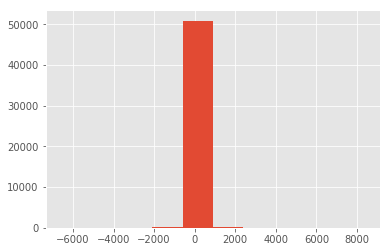

In [128]:
plt.hist(orders.Profit)

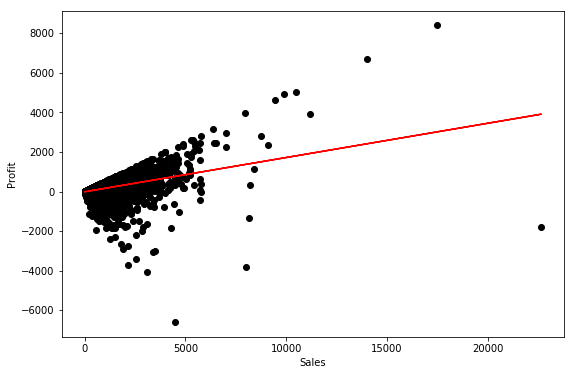

In [7]:
x = orders[["Sales"]] #MAKE IT dataframe for scikit learn
y = orders["Profit"]
## do a scatter plot with data x and y
#plt.figure(figsize=(9, 6))
#plt.scatter(x, y, c='k')
#plt.xlabel('Sales')
#plt.ylabel('Profit')
#plt.show()

from sklearn import linear_model
ols= linear_model.LinearRegression()
ols.fit(X=x,y=y)
plt.figure(figsize=(9, 6))
plt.scatter(x, y, c='k')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.plot(x, ols.predict(x), c='r', lw=1.5, label='Predicted relation')
plt.show()

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

In [129]:
orders["Order.Date"]
orders["Order.Date"]=pd.to_datetime(orders["Order.Date"]) #use pandas to convert to datetimeb

In [130]:
orders["year"]=orders["Order.Date"].dt.year
orders["month"]=orders["Order.Date"].dt.month

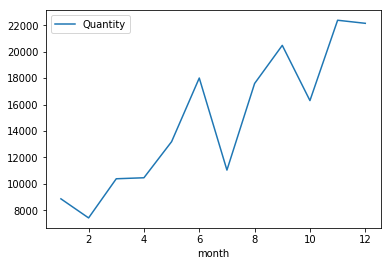

In [70]:
trenddata=orders.groupby(["month"])[["Quantity"]].sum()

trenddata.plot()
plt.show()

<Figure size 432x288 with 0 Axes>

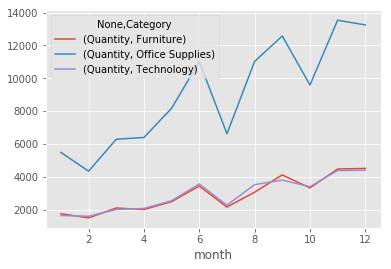

In [76]:
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

plt.figure()
orders.groupby(["month","Category"])[["Quantity"]].sum().unstack().plot()

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [180]:
returns=pd.read_csv("Returns.csv")
#returns=returns.rename(columns = {'Order ID':'Order.ID'})
returns.shape

(1079, 3)

In [133]:
combined=pd.merge(orders,returns,left_on="Order.ID", right_on="Order ID",how="outer")

In [137]:
#1How much profit did we lose due to returns each year?
combined[combined["Returned"]=="Yes"][["Profit","year"]].groupby("year").sum()b

,Profit
year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


In [140]:
#returned customers
returned=combined[combined["Returned"]=="Yes"]

In [205]:
#How many customer returned more than once? more than 5 times?
returned.groupby("Customer.Name").count().iloc[:,1].shape #593
sum(returned.groupby("Customer.ID")["Customer.ID"].count()>5)#.iloc[:,1]>5) #124

46

In [183]:
returned.shape

(2220, 29)

In [190]:
#Which regions are more likely to return orders?
sum(returned["Region_x"]==returned["Region_y"])
returned.groupby("Region_x")["Region_x"].count().sort_values(ascending=False)

Region_x
Central America      248
Western Europe       233
Western US           177
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            74
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Canada                15
Central Asia           9
Name: Region_x, dtype: int64

In [194]:
#Which categories (sub-categories) of products are more likely to be returned?
returned.groupby(["Category","Sub.Category"])[["Category","Sub.Category"]].count().sort_values(by="Category",ascending=False)

C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'Category' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


Category  Sub.Category
Category        Sub.Category                        
Office Supplies Binders            269           269
                Art                217           217
                Storage            212           212
                Paper              150           150
Furniture       Chairs             147           147
Technology      Phones             145           145
                Accessories        138           138
Office Supplies Labels             137           137
Furniture       Furnishings        135           135
                Bookcases          104           104
Office Supplies Supplies           103           103
                Fasteners          102           102
                Envelopes           99            99
Technology      Copiers             99            99
                Machines            63            63
Office Supplies Appliances          59            59
Furniture       Tables              41            41